In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

# Welcome to a guide on Gradient Boosting ⚡️

### Gradient Boosting is one of the most powerful options out there for a machine learning algorithm and its powers really shows when utilizing tabular data.
### It does not fear of any non-linearity in the data or any categorial variables as it is able to deal with it just fine.
### These days, there are readily available models such as XGBoost and LightGBM which you can just call on with a few simple lines of code. 
### However, in the long run, it definitely pays to thoroughly understand the foundation of this algorithm before you blindly use it. 
### In this guide, I will walk you through the concept of Gradient Boosting, the mathematics behind it and make sure you fully grasp its concept.

## Let's dive in, shall we? 

<div style="width:100%;text-align: center;"> <img align=middle src="https://images.unsplash.com/photo-1682687982049-b3d433368cd1?q=80&w=2671&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" style="width:50%;height:50%;margin:auto;"> </div>
<h5><center>Image from <a href="https://unsplash.com/s/photos/dive-in">unsplash</a></center></h5>

# 1. Introduction

#### Gradient Boosting is a pretty interesting algorithm in the sense that the technique, Gradient Descent, used widely in Deep Learning, is also applied to this very algorithm.
#### The whole concept of Gradient Boosting is about using multiple weak models and combining them to create one powerful model that works to build on the mistake of its other previous models.
#### Once you understand the mathematical concept behind this, trust me, you will get to see the true beauty of the simplicity behind this model's approach.

# 2. Math

<div style="width:100%;text-align: center;"> <img align=middle src="https://miro.medium.com/v2/resize:fit:1400/1*dIHrPFBT2fmXuTXMb-3_Xw.png" style="width:50%;height:50%;margin:auto;"> </div>
<h5><center>Image from TDS</center></h5>

#### This is the whole Gradient Boosting Algorithm! If you can understand this in one go, I would say you are a math genius.
#### But for the rest of us more 'normal' people, let me break this down for you. 
#### Fret not, because once all these lines are explained, you'll see why everyone is talking about Gradient Boosting and its powers. 

## Step 1. Initialize the model with a constant value

$$\LARGE F_0(x) =  argmin_\gamma \sum_{i=1}^{n}L(y_i, \gamma) $$

#### The first initializing step is to find an initial constant value prediction $ F_0(x) $
#### Of course, this is just our initial prediction so it will look like a disastrous prediction, but let's be patient and see where it goes.
#### Forget about the left hand side for now, and let's look at the right hand side.

#### The right hand side talks about a $\gamma$ value that will minimize $\sum_{i=1}^{n}L(y_i, \gamma)$.
#### To do this, let's take squared loss as our loss function and apply some differentiation

$$\LARGE \frac{\partial}{\partial\gamma} \sum_{i=1}^{n}L(y_i, \gamma)  =  \frac{\partial}{\partial\gamma} \sum_{i=1}^{n}(y_i-\gamma)^2$$
$$\LARGE = -2 \sum_{i=1}^{n} (y_i-\gamma) $$
$$\LARGE = -2 \sum_{i=1}^{n}y_i + 2n\gamma$$

#### As we are finding $\gamma$ that minimizes $\sum_{i=1}^{n}L(y_i, \gamma)$, we have to make $\frac{\partial}{\partial\gamma} \sum_{i=1}^{n}L(y_i, \gamma)=0$

$$\LARGE -2 \sum_{i=1}^{n}y_i + 2n\gamma = 0$$
$$\LARGE n\gamma = \sum_{i=1}^{n}y_i$$
$$\LARGE \gamma = \frac{1}{n} \sum_{i=1}^{n}y_i = \overline{y}$$

#### All this while, we were looking for the $\gamma$ and here we found it!
#### In the end, it was just a simple average of the y values.
$$\LARGE F_0(x) = \overline{y}$$

## Step 2. Looping for M times
#### After initializing our prediction, we will loop through M times where M denotes the number of trees we will be creating for this Gradient Boosting algorithm.

### 2.1 Computing residuals
#### Now this might sound strange.


<h1><center><i>"What's a residual suddenly...?"</i></center></h1>

#### I recommend you to ignore the term 'residual' for now but instead focus on the right hand side of the equation. 
#### The right hand side is basically partially differentiating the loss between the y value and the previous prediction with respect to the previous prediction.
#### For those of you who feel like this is a familiar equation, with the negative sign at the front, you probably have seen something similar for gradient descent in a neural network of sorts. 
#### This step is providing us the direction and magnitude in which we can take to minimize the loss function, for each sample $i$.
#### Let's solve the right hand side of the equation.

$$\LARGE -[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}]_{F(x) = F_{m-1} (x)} $$
$$\LARGE = -\frac{\partial (y_i - F_{m-1}(x_i))^2}{\partial F_{m-1}(x_i)} $$
$$\LARGE = 2(y_i - F_{m-1}(x_i)) $$

#### Removing the constant in this equation, 2, will give us $ y_i-F_{m-1}(x_i) $ which is the residual, thus giving it its name. 
#### This cool simplification successfully shows us that the negative gradient to follow to minimize the loss is just the residuals.

### 2.2 Training regression tree

#### Now we are going to train a regression tree using $x$ as features to predict for $r$, the residual.
#### Each tree can have multiple leaves, also known as terminal nodes.

### 2.3 Computing for $\gamma_{jm}$

#### We will now have to search for $\gamma_{jm}$ where $j$ represents different terminal nodes in a tree. 
#### We will be finding the $\gamma$ that will minimize the loss on all the samples that belong to that terminal node.
#### Here, we are basically trying to minimize the loss/residual/difference between y and our prediction.

$$\LARGE \gamma_{jm} = \underset{\gamma}{\operatorname{argmin}} \sum_{x_i \in R_{jm}} L(y_i, F_{m-1}(x_i) + \gamma)$$
$$\LARGE = \underset{\gamma}{\operatorname{argmin}} \sum_{x_i \in R_{jm}} (y_i-F_{m-1}(x_i) - \gamma)^2$$

$$\LARGE \frac{\partial}{\partial \gamma} \sum_{x_i \in R_{jm}} (y_i - F_{m-1}(x_i) - \gamma)^2 = 0$$
$$\LARGE -2 \sum_{x_i \in R_{jm}} (y_i-F_{m-1}(x_i) - \gamma) = 0$$
$$\LARGE n_j\gamma = \sum_{x_i \in R_{jm}} (y_i-F_{m-1}(x_i))$$
$$\LARGE \gamma = \frac{1}{n_j} \sum_{x_i \in R_{jm}} r_{im}$$

#### The $n_j$ stands for the number of samples in that specific j terminal node
#### Now this finding means that our optimal $\gamma_{jm}$ is the average of our residuals in the specific terminal nodes. 

### 2.4 Updating our model
#### Now that we calculated thus here, we need to update our model.
#### We are now predicting for $F_m(x)$, the new prediction.
#### How this is done is building on our previous tree's prediction and improving on it.

$$\LARGE F_m(x) = F_{m-1}(x) + v \sum_{j=1}^{J_m} \gamma_{jm} 1(x\in R_{jm})$$

#### Now this is something similar to updating the weights of a neural network.
#### $ \gamma_{jm} 1(x\in R_{jm}) $ means that we pick the value of $\gamma_{jm}$ if a given x belongs to that specific $j$ terminal node. 
#### This corresponding $\gamma_{jm}$ is added to the previous prediction, $F_{m-1}(x)$ and produces the updated prediction, $F_m(x)$.
#### The $v$ is a learning rate, set to control the influence the new tree has on the predictions.

#### That's it! This is the mathematical explanation of the Gradient Boosting algorithm.
#### I would say the most important part to wrap your head around is the $\gamma_{jm}$ which is simply the average of the residuals for the points falling into that specific terminal node.
#### The rest of the calculation and mathematical concepts are similar to that of deep learning which is seen widely in today's scene.
#### As for the loss function, the only limitation is that it should be differentiable. Any other loss function is acceptable too.

# 3. Code

#### Alright! Enough of that tedious math (which is totally fun once you fall into the trap).
#### Let's see the whole algorithm in action in code. 
#### I will outline in the code which steps the individual lines of code are referring to in the algorithm writing. 

In [5]:
from sklearn.tree import DecisionTreeRegressor
class GradientBoosting:

    def __init__(self, v, n_estimators, max_depth=1):
        self.v = v
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = [] # A list to store all the trees that are trained 

    def fit(self, X, y):
        
        self.F0 = y.mean() # Step 1
        Fm = self.F0

        for _ in range(self.n_estimators): # Step 2
            r = y-Fm # Step 2.1 
            tree = DecisionTreeRegressor(max_depth = self.max_depth, random_state = 42)
            tree.fit(X,r) # Step 2.2 
            gamma = tree.predict(X) # Step 2.3 
            Fm += self.v * gamma # Step 2.4 
            self.trees.append(tree)
    
    def predict(self, X):

        Fm = self.F0

        for i in range(self.n_estimators):
            Fm += self.v * self.trees[i].predict(X)
        
        return Fm

#### Let's generate some non-linear data to try out our Gradient Boosting algorithm.

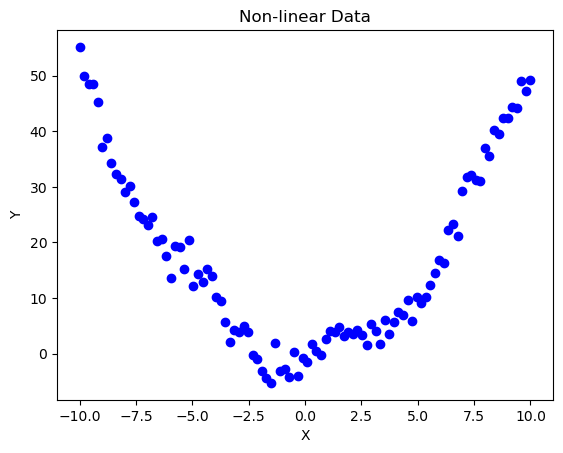

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate non-linear data
np.random.seed(0)
X = np.linspace(-10, 10, 100)
Y = 0.5 * X**2 + 3 * np.sin(X) + np.random.normal(0, 2, 100)  # Non-linear relationship with some noise

# Plot the data
plt.scatter(X, Y, color='b')
plt.title('Non-linear Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [17]:
# Testing our algorithm
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoosting(n_estimators=20, v = 0.1, max_depth=1)
gbm.fit(X.reshape(-1,1),Y)
rmse = mean_squared_error(Y, gbm.predict(X.reshape(-1,1)))
print(f"Our algorithm's RMSE is {rmse:.2f}")

sklearn_gbm = GradientBoostingRegressor(
    n_estimators=20, 
    learning_rate=0.1, 
    max_depth=1
)
sklearn_gbm.fit(X.reshape(-1,1),Y)
sklearn_gbm_rmse = mean_squared_error(Y, sklearn_gbm.predict(X.reshape(-1,1)))
print(f"Sklearn's GBM's RMSE is {sklearn_gbm_rmse:.2f}")

Our algorithm's RMSE is 87.81
Sklearn's GBM's RMSE is 87.81


#### We can see that under the hood, scikit learn's Gradient Boosting Regressor is nothing too fancy, but just religiously sticking by the mathematical writings of the algorithm.

# 4. XGBoost 

#### Ending this guide on this note would be sufficient enough for those seeking to understand what the foundation of a Gradient Boosting algorithm is. 
#### However, I believe everyone wishes to understand the popular algorithm used nowadays when it comes to boosting models, the XGBoost algorithm.
#### Before we end, I will dive briefly into what XGBoost is about and hopefully give you a deeper understanding of it.

#### So there are some notable distinctions of XGBoost compared to a conventional gradient boosting algorithm. 
#### Some of them are: 
##### - Regularization
##### - Tree pruning 
##### - Parallelization

#### So for XGBoost algorithms, we split down and make trees based on the Similarity Score as shown below.

$$\LARGE \frac{(\sum residuals)^2}{len(residuals) + \lambda}$$

#### The $\lambda$ here represents regularization.
#### $\lambda$ also controls how much to change the previous prediction by, providing users with a way to control the variance of the prediction.
#### Now, trees are constructed to maximize this similarity score gain, either down to the maximum depth or till there is only one residual remaining in the node.
#### Pruning comes into play when the tree is pruned from bottom up, till the point where the Gain of a parent node is greater than the hyper parameter $\gamma$
#### With tree pruning, XGBoost showcases improved model generalization, lowering possibility of overfitting.
#### Parallelization is also achieved by parallel tree construction when finding for the best split at each node. 

# Conclusion

#### I hope this guide helped you understand the Gradient Boosting algorithm. 
#### I highly suggest you to understand this algorithm and make sure you understand how it works before using it. 
#### This is a potent algorithm that is used widely in competitions for high scores due to its outperformance and robustness. 
#### With this, I will see you in the next guide!

# Credit

* https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502
* https://medium.com/@prathameshsonawane/xgboost-how-does-this-work-e1cae7c5b6cb